        id  MonsoonIntensity  TopographyDrainage  RiverManagement  \
0  1117957                 4                   6                3   
1  1117958                 4                   4                2   
2  1117959                 1                   3                6   
3  1117960                 2                   4                4   
4  1117961                 6                   3                2   

   Deforestation  Urbanization  ClimateChange  DamsQuality  Siltation  \
0              5             6              7            8          7   
1              9             5              5            4          7   
2              5             7              2            4          6   
3              6             4              5            4          3   
4              4             6              4            5          5   

   AgriculturalPractices  ...  IneffectiveDisasterPreparedness  \
0                      8  ...                                8   
1             

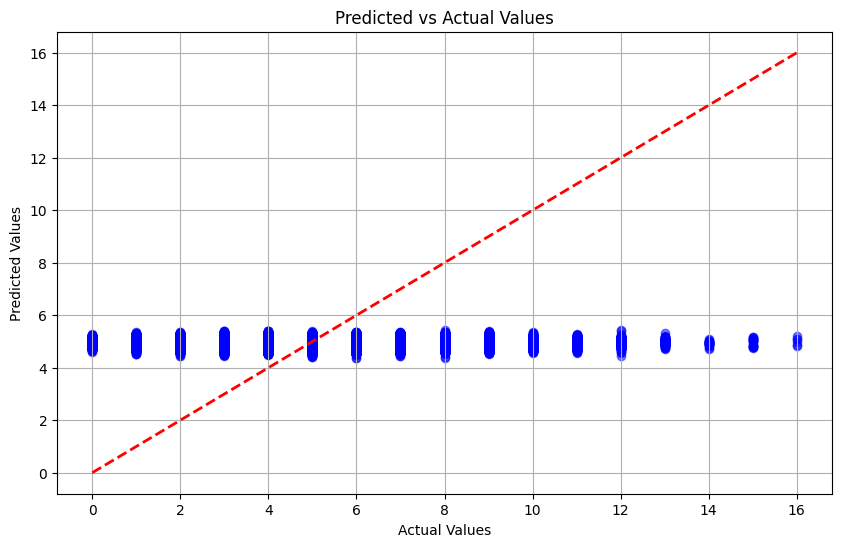

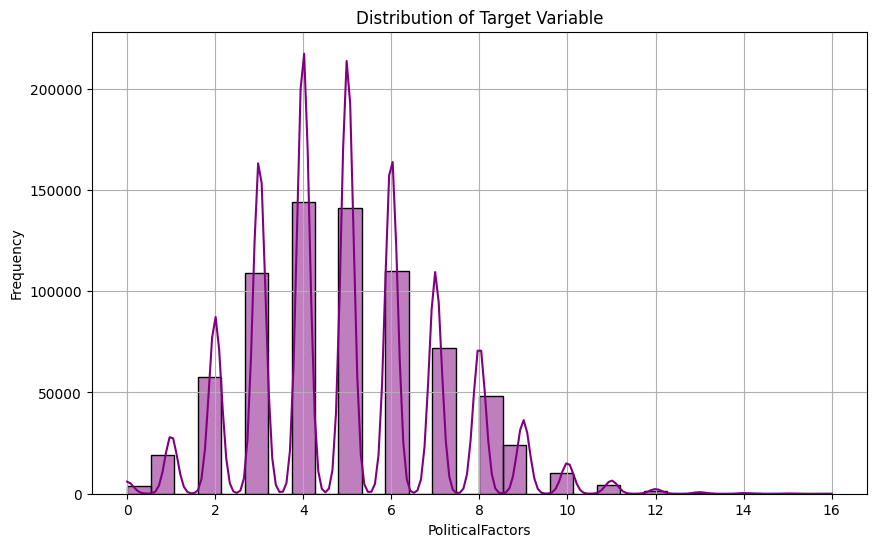

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset from a CSV file
file_path = 'test.csv'  # Replace with the actual file path
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify the data
print(df.head())

# Descriptive statistics
print("\nDescriptive Statistics:\n", df.describe())

# Data Preprocessing
# Assume the last column is the target variable
target_column = df.columns[-1]  # Replace with your actual target column if different
X = df.drop(columns=[target_column])  # Features
y = df[target_column]  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Plot the predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', lw=2)  # Diagonal line
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid()
plt.savefig('predicted_vs_actual.png')  # Save the plot
plt.show()

# Create a histogram of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(y, bins=30, kde=True, color='purple')
plt.title('Distribution of Target Variable')
plt.xlabel(target_column)
plt.ylabel('Frequency')
plt.grid()
plt.savefig('target_variable_distribution.png')  # Save the histogram
plt.show()
